In [1]:
#Import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("movie_metadata.csv")

In [3]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [5]:
data.shape

(5043, 28)

In [6]:
data.movie_title

0                                                 Avatar 
1               Pirates of the Caribbean: At World's End 
2                                                Spectre 
3                                  The Dark Knight Rises 
4       Star Wars: Episode VII - The Force Awakens    ...
                              ...                        
5038                             Signed Sealed Delivered 
5039                           The Following             
5040                                A Plague So Pleasant 
5041                                    Shanghai Calling 
5042                                   My Date with Drew 
Name: movie_title, Length: 5043, dtype: object

In [9]:
data.movie_title.duplicated().sum()

126

In [10]:
data.movie_title.nunique()

4917

In [11]:
5043-4917

126

In [12]:
data.movie_title[data.movie_title.duplicated()]

137                          The Legend of Tarzan 
187     The Twilight Saga: Breaking Dawn - Part 2 
204                           Godzilla Resurgence 
303                                           Pan 
389                                Fantastic Four 
                           ...                    
4942                                   Cat People 
4950                            A Dog's Breakfast 
4951                     Night of the Living Dead 
4971                   The Last House on the Left 
5012                                     Sabotage 
Name: movie_title, Length: 126, dtype: object

In [13]:
data.movie_title[data.movie_title.duplicated()][137]

'The Legend of Tarzan\xa0'

In [14]:
data[data.movie_title=='The Legend of Tarzan\xa0']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
63,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,124051759.0,Action|Adventure|Drama|Romance,...,239.0,English,USA,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000
137,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,124051759.0,Action|Adventure|Drama|Romance,...,239.0,English,USA,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000


In [15]:
data.drop_duplicates()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [17]:
data.drop_duplicates("movie_title",inplace=True)

In [18]:
data.shape

(4917, 28)

In [20]:
data.movie_title.nunique()

4917

In [21]:
data.isnull().sum()

color                         19
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        863
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               300
budget                       484
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 326
movie_facebook_likes           0
dtype: int64

In [22]:
data.gross

0       760505847.0
1       309404152.0
2       200074175.0
3       448130642.0
4               NaN
           ...     
5038            NaN
5039            NaN
5040            NaN
5041        10443.0
5042        85222.0
Name: gross, Length: 4917, dtype: float64

In [23]:
data.budget

0       237000000.0
1       300000000.0
2       245000000.0
3       250000000.0
4               NaN
           ...     
5038            NaN
5039            NaN
5040         1400.0
5041            NaN
5042         1100.0
Name: budget, Length: 4917, dtype: float64

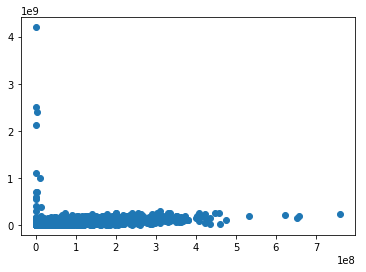

In [24]:
plt.scatter(data.gross,data.budget)

In [25]:
data.describe(exclude=object).columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

In [26]:
(data.dtypes!=object).sum()

16

In [27]:
numerical_cols =data.describe(exclude=object).columns

C:\Users\Anil Arella\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\Anil Arella\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1879: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Users\Anil Arella\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1887: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\Users\Anil Arella\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1888: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


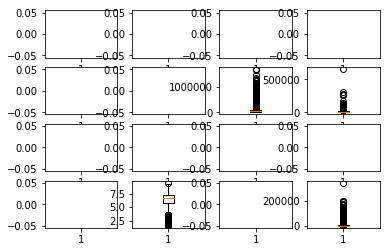

In [29]:
for ind in range((data.dtypes!=object).sum()):
    plt.subplot(4,4,ind+1)
    plt.boxplot(data[numerical_cols[ind]])

In [30]:
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].mean())

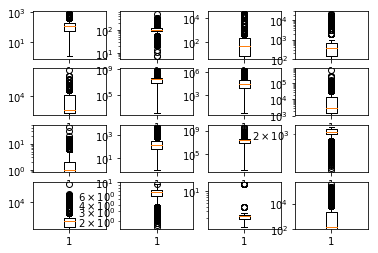

In [32]:
for ind in range((data.dtypes!=object).sum()):
    plt.subplot(4,4,ind+1)
    plt.boxplot(data[numerical_cols[ind]])
    plt.yscale('log')

In [33]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4.917000e+03,4.917000e+03,4917.000000,4917.000000,4917.000000,4.917000e+03,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000
mean,137.983566,107.089963,690.871028,631.203515,6493.369450,4.764451e+07,8.263723e+04,9578.276998,1.377039,267.651348,3.654150e+07,2002.443567,1621.649470,6.437584,2.222267,7346.799675
std,119.626921,25.244900,2803.136325,1621.909129,15094.893157,6.117379e+07,1.383091e+05,18162.789993,2.021037,372.101433,9.517021e+07,12.320819,4005.629524,1.127740,1.355487,19204.348861
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,608.000000,8.070311e+06,8.367000e+03,1395.000000,0.000000,64.000000,7.000000e+06,1999.000000,278.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,51.000000,369.000000,982.000000,3.697637e+07,3.315800e+04,3049.000000,1.000000,154.000000,2.300000e+07,2005.000000,593.000000,6.600000,2.222267,158.000000
75%,191.000000,118.000000,213.000000,631.203515,11000.000000,5.085989e+07,9.376700e+04,13616.000000,2.000000,319.000000,4.000000e+07,2010.000000,915.000000,7.200000,2.350000,2000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,4.200000e+09,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [45]:
data_sc = data.copy()

In [43]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(data[['num_critic_for_reviews']])
data_sc[['num_critic_for_reviews']] = sc.transform(data[['num_critic_for_reviews']])

In [39]:
a = np.array([12,54,789,53,543])
print(a.ndim)

1


In [41]:
a1 = a.reshape(1,-1)
print(a1.ndim)

2


In [44]:
data_sc['num_critic_for_reviews'].describe()

count    4917.000000
mean        0.168699
std         0.147324
min         0.000000
25%         0.060345
50%         0.134236
75%         0.233990
max         1.000000
Name: num_critic_for_reviews, dtype: float64

In [46]:
sc = MinMaxScaler()
sc.fit(data[numerical_cols])
data_sc[numerical_cols] = sc.transform(data[numerical_cols])

In [47]:
data_sc.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000
mean,0.168699,0.198591,0.030038,0.027444,0.010146,0.062648,0.048902,0.014585,0.032024,0.052708,0.008700,0.864436,0.011837,0.612352,0.070328,0.021051
std,0.147324,0.050089,0.121875,0.070518,0.023586,0.080438,0.081851,0.027656,0.047001,0.073552,0.022660,0.123208,0.029238,0.142752,0.091463,0.055027
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.060345,0.170635,0.000304,0.005783,0.000950,0.010612,0.004949,0.002124,0.000000,0.012453,0.001667,0.830000,0.002029,0.531646,0.045209,0.000000
50%,0.134236,0.190476,0.002217,0.016043,0.001534,0.048621,0.019620,0.004643,0.023256,0.030243,0.005476,0.890000,0.004328,0.632911,0.070328,0.000453
75%,0.233990,0.220238,0.009261,0.027444,0.017188,0.066876,0.055488,0.020733,0.046512,0.062858,0.009524,0.940000,0.006679,0.708861,0.078947,0.005731
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
